# Import Libraries

In [3]:
import os
import sys

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot

%matplotlib inline

In [4]:
home = os.getenv("HOME")
nlp_repo = os.path.join(home, 'git/nlp-product-sentiment-classification')
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

## Get the Data

**read Train.csv as a dataframe called train_reviews**

In [5]:
# make path flexible
train_csv_path = os.path.join(nlp_repo, 'data/03_processed/Train.csv')
train_reviews = pd.read_csv(train_csv_path)

** Check out the info(), head(), and describe() methods on train_reviews **

# Setting up the Data
**Check train_reviews.info() again.**

In [6]:
train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB


## Categorical Features
Product_Type needs to be one-hot encoded

In [8]:
train_reviews_oh = pd.get_dummies(data=train_reviews, columns=['Product_Type'])
train_reviews_oh.head()

,Text_ID,Product_Description,Sentiment,Product_Type_0,Product_Type_1,Product_Type_2,Product_Type_3,Product_Type_4,Product_Type_5,Product_Type_6,Product_Type_7,Product_Type_8,Product_Type_9
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,2,0,0,0,0,0,0,0,0,0,1
1,6254,RT @mention Line for iPad 2 is longer today th...,2,0,0,0,0,0,0,0,0,0,1
2,8212,Crazy that Apple is opening a temporary store ...,2,0,0,0,0,0,0,0,0,0,1
3,4422,The lesson from Google One Pass: In this digit...,2,0,0,0,0,0,0,0,0,0,1
4,5526,RT @mention At the panel: &quot;Your mom has a...,2,0,0,0,0,0,0,0,0,0,1


# Text

Product_Description is the real task at hand 🤓
It needs to be tokenized and vectorized before it can be fed into a model

In [36]:
import nltk

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/iskriyanavasileva/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### 2. Remove StopWords

In [65]:
from nltk.corpus import stopwords

In [66]:
tokens_unnested = [item for sublist in tokens for item in sublist]

In [74]:
tokens_np = train_reviews.loc[:, 'Product_Description'].to_numpy()

In [79]:
tokens_np[4]

'RT @mention At the panel: &quot;Your mom has an ipad, designing for boomers&quot; #sxsw'

In [84]:
for index, review in enumerate(tokens_np[:16]):
    print("Index: {} Length: {}".format(index, len(review)))

Index: 0 Length: 89
Index: 1 Length: 119
Index: 2 Length: 111
Index: 3 Length: 137
Index: 4 Length: 87
Index: 5 Length: 137
Index: 6 Length: 112
Index: 7 Length: 115
Index: 8 Length: 90
Index: 9 Length: 110
Index: 10 Length: 96
Index: 11 Length: 121
Index: 12 Length: 99
Index: 13 Length: 134
Index: 14 Length: 125
Index: 15 Length: 104


min 11
mean 104.64346323067254
std 27.28305668307883
max 178


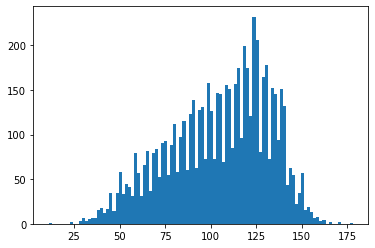

In [87]:
lengths = [len(x) for x in tokens_np]
print("min", np.min(lengths))
print("mean", np.mean(lengths))
print("std", np.std(lengths))
print("max", np.max(lengths))
plt.hist(lengths, bins=100)
plt.show()
plt.close()

In [73]:
tokens[:2]

[['The',
  'Web',
  'Designer\x89Ûªs',
  'Guide',
  'to',
  'iOS',
  '(and',
  'Android)',
  'Apps,',
  'today',
  '@mention',
  '10',
  'a.m!',
  '{link}',
  '#sxsw'],
 ['RT',
  '@mention',
  'Line',
  'for',
  'iPad',
  '2',
  'is',
  'longer',
  'today',
  'than',
  'yesterday.',
  '#SXSW',
  '//',
  'are',
  'you',
  'getting',
  'in',
  'line',
  'again',
  'today',
  'just',
  'for',
  'fun?']]

In [67]:
sr = stopwords.words('english')
clean_tokens = tokens_unnested[:]

for token in tokens: 
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

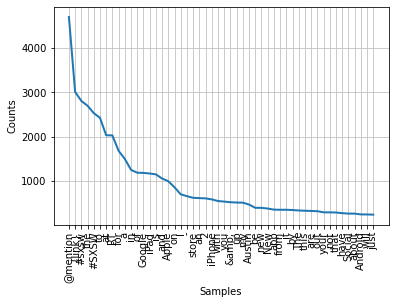

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [70]:
freq = nltk.FreqDist(clean_tokens)
#for key, val in freq.items():
#    print(str(key) + ':' + str(val))
    
freq.plot(50, cumulative=False)

# Text Pre-Processing

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from keras import models
from keras import layers
from keras.utils import to_categorical
import os
import urllib # check
from collections import Counter # check
import html
import nltk 
nltk.download('punkt') # check
nltk.download('perluniprops') # check
from nltk import word_tokenize
import pickle
import random # check
import progressbar
import keras
from keras import models
from keras import layers
from keras import utils

# This tokenizer is nice, but could cause problems.
try:
    from nltk.tokenize.moses import MosesDetokenizer
    detokenizer = MosesDetokenizer()
    use_moses_detokenizer = True
except:
    use_moses_detokenizer = False